## **Machine Learning & Pattern Recognition CA_TWO**

In the Qyestion 1, we carry out two different procedures:

1.Reading and visualizing SUV Data

2.Modeling SUV data using GaussianNB, KNeighbors and DecisionTree Classifiers


The dataset referred to as SUV contains information regarding clients and whether or not they have purchased an SUV.

# **INSTALLATION**

In [560]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [561]:
df = pd.read_csv("/content/suv_data.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [562]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [563]:
df.shape

(400, 5)

In [564]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [565]:
print("Number of customers: ", len(df))

Number of customers:  400


# **Customers who purchased the SUV**

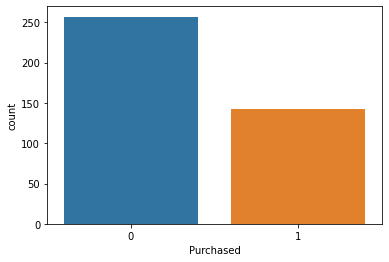

In [566]:
sns.countplot(x='Purchased', data = df)

# **Customers who purchased the SUV based on Gender**

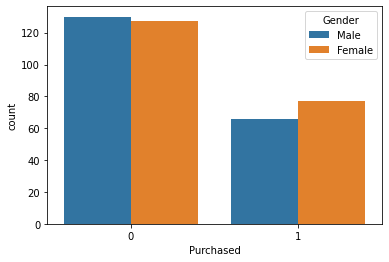

In [567]:
sns.countplot(x='Purchased', hue = 'Gender', data = df)

In [568]:
Gender = pd.get_dummies(df['Gender'], drop_first = True)
Gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [569]:
df = pd.concat([df, Gender], axis = 1)

# **Dropping User ID and Gender column**

In [570]:
df.drop(['User ID', 'Gender'], axis = 1, inplace = True)
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [571]:
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

# **Modeling Data**

In [572]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

minScalar = MinMaxScaler()
stdScalar = StandardScaler()

In [573]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(400, 3)
(400,)


# **Classification algorithms**

In [574]:
#GuassianNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [575]:
y_pred = classifier.predict(X_test)

In [576]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



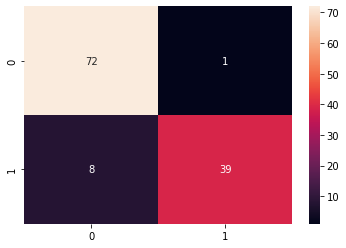

In [577]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [578]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
x1 = minScalar.fit_transform(X_train)
x2 = minScalar.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors= 3 , metric= 'minkowski', p = 2)
classifier.fit(x1, y_train)

KNeighborsClassifier(n_neighbors=3)

In [579]:
y_pred = classifier.predict(x2)

In [580]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        73
           1       0.89      0.87      0.88        47

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



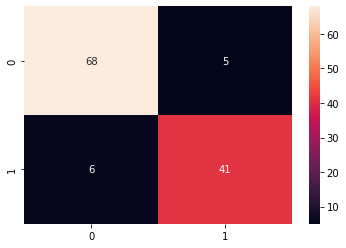

In [581]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [582]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [583]:
y_pred = classifier.predict(X_test)

In [584]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        73
           1       0.82      0.85      0.83        47

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



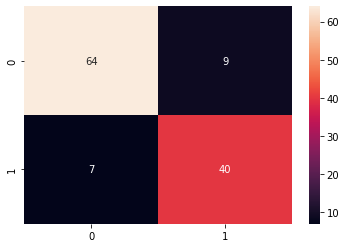

In [585]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# **Different Train-Test Data Ratios**

In [586]:
score = {}
tr_size = [0.25,0.35,0.45]
seed=42

for i in tr_size:

  Acc = {}

  cl1 = GaussianNB()
  cl2 = KNeighborsClassifier(n_neighbors= 3 , metric= 'minkowski', p = 2)
  cl3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =i, random_state = seed)

  x1 = minScalar.fit_transform(X_train)
  x2 = minScalar.transform(X_test)

  cl1.fit(X_train,y_train)
  cl2.fit(x1,y_train)
  cl3.fit(X_train,y_train)

  y1_pred = cl1.predict(X_test)
  y2_pred = cl2.predict(x2)
  y3_pred = cl3.predict(X_test)

  Acc['GaussianNB'] = accuracy_score(y_test,y1_pred)
  Acc['KNN'] = accuracy_score(y_test,y2_pred)
  Acc['DecisionTree'] = accuracy_score(y_test,y3_pred)


  score[i] = Acc
  print(Acc)

  
print(score)

{'GaussianNB': 0.92, 'KNN': 0.91, 'DecisionTree': 0.86}
{'GaussianNB': 0.8857142857142857, 'KNN': 0.9214285714285714, 'DecisionTree': 0.8714285714285714}
{'GaussianNB': 0.8944444444444445, 'KNN': 0.8888888888888888, 'DecisionTree': 0.8444444444444444}
{0.25: {'GaussianNB': 0.92, 'KNN': 0.91, 'DecisionTree': 0.86}, 0.35: {'GaussianNB': 0.8857142857142857, 'KNN': 0.9214285714285714, 'DecisionTree': 0.8714285714285714}, 0.45: {'GaussianNB': 0.8944444444444445, 'KNN': 0.8888888888888888, 'DecisionTree': 0.8444444444444444}}


In [587]:
score.values()

dict_values([{'GaussianNB': 0.92, 'KNN': 0.91, 'DecisionTree': 0.86}, {'GaussianNB': 0.8857142857142857, 'KNN': 0.9214285714285714, 'DecisionTree': 0.8714285714285714}, {'GaussianNB': 0.8944444444444445, 'KNN': 0.8888888888888888, 'DecisionTree': 0.8444444444444444}])

In [588]:
for i in list(score.values()):
  print(list(i.keys()))
  print(list(i.values()))

['GaussianNB', 'KNN', 'DecisionTree']
[0.92, 0.91, 0.86]
['GaussianNB', 'KNN', 'DecisionTree']
[0.8857142857142857, 0.9214285714285714, 0.8714285714285714]
['GaussianNB', 'KNN', 'DecisionTree']
[0.8944444444444445, 0.8888888888888888, 0.8444444444444444]


In [589]:
df_new = pd.DataFrame.from_dict(score,orient='index')
df_new

,GaussianNB,KNN,DecisionTree
0.25,0.920000,0.910000,0.860000
0.35,0.885714,0.921429,0.871429
0.45,0.894444,0.888889,0.844444


Text(0.5, 1.0, 'Test size vs Accuracy')

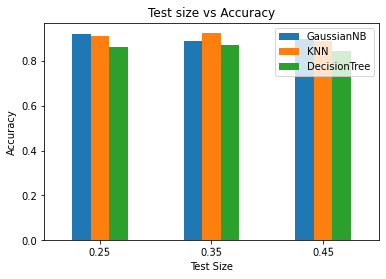

In [590]:
gr = df_new.plot.bar(rot=1)
gr.set_xlabel('Test Size')
gr.set_ylabel('Accuracy')
gr.set_title('Test size vs Accuracy')

# **Ensemble methods**

# 1.Bagging

In [591]:
from sklearn.ensemble import BaggingClassifier

Guass_Bagg = BaggingClassifier(
    base_estimator=GaussianNB(),
    n_estimators=50,
    max_samples=0.8,
    oob_score= True
)


Knr_Bagg = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors= 3 , metric= 'minkowski', p = 2),
    n_estimators=50,
    max_samples=0.8,
    oob_score= True
)


DecTree_Bagg = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    n_estimators=50,
    max_samples=0.8,
    oob_score= True
)

# **Monte Carlo Analysis for 100 runs**

In [592]:
from sklearn.metrics import accuracy_score

GuassAc = []
KnbrAc = []
DecTreeAc = []
seed=42

for i in range(100):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = seed)
  Guass_Bagg.fit(X_train,y_train)
  GuassAc.append(accuracy_score(y_test,Guass_Bagg.predict(X_test)))
  x1 = minScalar.fit_transform(X_train)
  xt = minScalar.transform(X_test)
  Knr_Bagg.fit(x1,y_train)
  KnbrAc.append(accuracy_score(y_test,Knr_Bagg.predict(xt)))
  DecTree_Bagg.fit(X_train,y_train)
  DecTreeAc.append(accuracy_score(y_test,DecTree_Bagg.predict(X_test)))



print('Naive Baise:  ', np.mean(GuassAc))
print('Knn:   ',np.mean(KnbrAc))
print('Decision Tree: ',np.mean(DecTreeAc))

score = [GuassAc,KnbrAc,DecTreeAc]
models = ['Naive Baise','Knn','Decision Tree']

Naive Baise:   0.925
Knn:    0.9484999999999999
Decision Tree:  0.9130000000000003


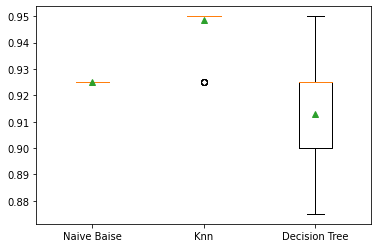

In [593]:
plt.boxplot(score,labels=models ,showmeans=True)
plt.show()

# 2.Boosting

In [594]:
from sklearn.ensemble import AdaBoostClassifier

Guass_Boost = AdaBoostClassifier(
    base_estimator=GaussianNB(),
    n_estimators=50,learning_rate=1
)


DecTree_Boost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    n_estimators=50,learning_rate=1
)

In [595]:
from sklearn.metrics import accuracy_score

GuassAc = []
DecTreeAc = []
seed=42

for i in range(100):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = seed)

  Guass_Boost.fit(X_train,y_train)
  GuassAc.append(accuracy_score(y_test,Guass_Boost.predict(X_test)))

  DecTree_Boost.fit(X_train,y_train)
  DecTreeAc.append(accuracy_score(y_test,DecTree_Boost.predict(X_test)))



print('Naive Baise:  ', np.mean(GuassAc))
print('Decision Tree:   ',np.mean(DecTreeAc))


score = [GuassAc,DecTreeAc]
models = ['Naive Baise','Decision Tree']

Naive Baise:   0.9749999999999995
Decision Tree:    0.7830000000000003


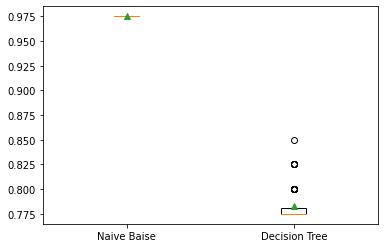

In [596]:
plt.boxplot(score,labels=models, showmeans=True)
plt.show()

# 3.Stacking

In [597]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', random_state = 0)


estimators = [('Gb', GaussianNB()),('KNN', KNeighborsClassifier(n_neighbors= 3 ,
              metric= 'minkowski', p = 2)),('Dt',DecisionTreeClassifier(
                  criterion = 'entropy', random_state = 0))]

st = StackingClassifier(estimators=estimators,final_estimator=DecisionTreeClassifier(criterion = 'entropy') )
StScore = []
seed=42
for i in range(100):

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = seed)
   st.fit(X_train,y_train)
   StScore.append(accuracy_score(y_test,st.predict(X_test)))


print('StackingScore:  ', np.mean(StScore))

StackingScore:   0.9000000000000005


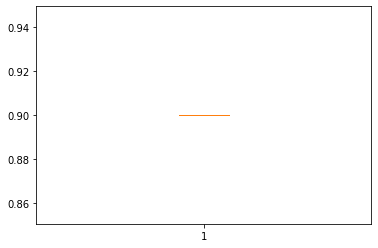

In [598]:
plt.boxplot(StScore);

# KNeighborsClassifier is the best classifier

The KNN algorithm is used to solve classification problems. KNN is an acronym for K Nearest neighbours. K represents the total number of neighbours in KNN. Let's examine the KNN algorithm's advantages and disadvantages.

# **Advantages and Limitations of KNeighborsClassifier**

**Advantages**
1. **No Training Period**: KNN is referred to as the Lazy Learner (Instance based learning). It does not acquire any knowledge during the training period. No discriminative function is derived from the training data. In other words, there is no required training period. It stores the training dataset and only learns from it while making predictions in real time. This makes the KNN method far faster than other training-required algorithms such as SVM, linear regression, etc.

2. Since the KNN algorithm does not require training before making predictions, new data can be supplied seamlessly without affecting the accuracy.

3. KNN is relatively easy to implement. The value of K and the distance function are the only two factors need to implement KNN (e.g. Euclidean or Manhattan etc.)

**Limitations**
1. Does not perform well with large datasets: In large datasets, the cost of calculating the distance between a new point and an existing point is extremely high, which hinders the algorithm's performance.

2. Does not perform well with high dimensions: The KNN algorithm does not perform well with big dimensional data because it becomes difficult to calculate the distance in each dimension with a large number of dimensions.

3. Before applying the KNN method to any dataset, feature scaling (standardization and normalization) must be performed. If not, KNN may generate inaccurate predictions.

4. KNN is susceptible to noise in the dataset, missing values, and outliers. We must manually fill in missing values and eliminate outliers.

# **Question 2 : Regression**

In [599]:
df = pd.read_csv("/content/suv_data.csv")

In [600]:
df.head()
ScoreR2_Reg = {}
ScoreMae_Reg = {}

In [601]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [602]:
cleaned_data_set = df.drop (columns = ['User ID'], axis = '1')
cleaned_data_set.head ()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [603]:
cleaned_data_set.describe ()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [604]:
age_category = []
for i in range (0, len  (df ['Age'])):
    if cleaned_data_set ['Age'][i] <= 20:
        age_category.append ('A');
    elif 20 < cleaned_data_set ['Age'][i] <= 26:
        age_category.append ('B');
    elif 26 < cleaned_data_set ['Age'][i] <= 30:
        age_category.append ('C');
    elif 30 < cleaned_data_set ['Age'][i] <= 40:
        age_category.append ('D');
    elif 40 < cleaned_data_set ['Age'][i] <= 50:
        age_category.append ('E');
    else:
        age_category.append ('F');

age_data_frame = pd.DataFrame (data = age_category, columns = ['AgeCategory'])
augmented_data_set = pd.concat([cleaned_data_set, age_data_frame], axis = 1)
augmented_data_set.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


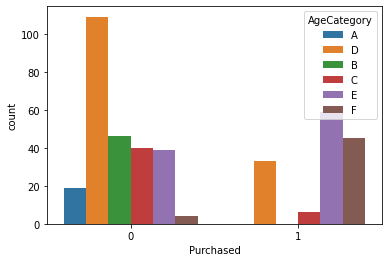

In [605]:
sns.countplot ( x = 'Purchased', hue = 'AgeCategory', data = augmented_data_set)

In [606]:
income_category = []
for i in range (0, len  (df ['EstimatedSalary'])):
    if cleaned_data_set ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < cleaned_data_set ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < cleaned_data_set ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < cleaned_data_set ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < cleaned_data_set ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < cleaned_data_set ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < cleaned_data_set ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

income_data_frame = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])
augmented_data_set_2 = pd.concat([augmented_data_set, income_data_frame], axis = 1)
augmented_data_set_2.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


In [607]:
binary_gender = pd.get_dummies (augmented_data_set_2 ['Gender'],drop_first = True)
binary_gender.head ()

,Male
0,1
1,1
2,0
3,0
4,1


In [608]:
binary_age = pd.get_dummies (augmented_data_set_2 ['AgeCategory'])
binary_age.head ()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [609]:
binary_income = pd.get_dummies (augmented_data_set_2 ['IncomeCategory'])
binary_income.head ()

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [610]:
final_data_set  = pd.concat ([augmented_data_set_2, binary_age, binary_gender, binary_income], axis = 1)
final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_data_set_1.head ()

,EstimatedSalary,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,19000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,20000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,43000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,57000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,76000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [611]:
y = final_data_set_1 ['EstimatedSalary']
X = final_data_set_1.drop (columns = ['EstimatedSalary'], axis = 1)

In [612]:
from sklearn.model_selection import train_test_split

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(400, 15)
(400,)


In [613]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

S = StandardScaler()
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)

In [614]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores)
scores.mean()
print(scores.mean())
reg.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-51484667.20918368 -85361732.28837027 -33584660.65433674
 -36267599.82047761 -59868142.3814671 ]
-53313360.47076708


LinearRegression(normalize=False)

In [615]:
ypred=reg.predict(X_test)

In [616]:
my_pd=pd.DataFrame(data=[y_test.tolist(),ypred]).T 
my_pd.columns=['y_test','ypred']
my_pd

,y_test,ypred
0,22000.0,28457.529694
1,88000.0,85297.529694
2,44000.0,51561.529694
3,96000.0,88913.529694
4,28000.0,29529.529694
...,...,...
115,20000.0,30353.529694
116,17000.0,15326.529694
117,93000.0,89713.529694
118,54000.0,51313.529694


In [617]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ScoreR2_Reg['LinearRegression'] = r2_score(y_test,y_pred)
ScoreMae_Reg['LinearRegression'] = mean_absolute_error(y_test,y_pred)

R2 score -3.8900540588007457
MAE 67766.25833333333


In [618]:
from sklearn.svm import SVR
reg=SVR(kernel='linear')
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores.mean())
reg.fit(X_train,y_train)

-1139172215.5447307


SVR(kernel='linear')

In [619]:
ypred=reg.predict(X_test)

In [620]:
my_pd=pd.DataFrame(data=[y_test.tolist(),ypred]).T
my_pd.columns=['y_test','ypred']
my_pd

,y_test,ypred
0,22000.0,70547.235452
1,88000.0,71416.438937
2,44000.0,70566.100653
3,96000.0,71353.718937
4,28000.0,70589.048785
...,...,...
115,20000.0,70589.048785
116,17000.0,70504.262307
117,93000.0,71336.716118
118,54000.0,70524.287319


In [621]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ScoreR2_Reg['SVR'] = r2_score(y_test,y_pred)
ScoreMae_Reg['SVR'] = mean_absolute_error(y_test,y_pred)

R2 score -3.8900540588007457
MAE 67766.25833333333


In [622]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state=3,max_depth=15)

regressor3.fit(X_train,y_train)
regressor3.score(X_test,y_test)

0.9184716529524605

In [623]:
y_pred = regressor3.predict(X_test)

In [624]:
my_pd=pd.DataFrame(data=[y_test.tolist(),ypred]).T
my_pd.columns=['y_test','ypred']
my_pd

,y_test,ypred
0,22000.0,70547.235452
1,88000.0,71416.438937
2,44000.0,70566.100653
3,96000.0,71353.718937
4,28000.0,70589.048785
...,...,...
115,20000.0,70589.048785
116,17000.0,70504.262307
117,93000.0,71336.716118
118,54000.0,70524.287319


In [625]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ScoreR2_Reg['DecisionTree'] = r2_score(y_test,y_pred)
ScoreMae_Reg['DecisionTree'] = mean_absolute_error(y_test,y_pred)

R2 score 0.9184716529524605
MAE 7213.113425925925


# Bagging

In [626]:
from sklearn.ensemble import BaggingRegressor

reg_Bagg = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=3,max_depth=15), n_estimators=10, random_state=0)
reg_Bagg.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                      random_state=3),
                 random_state=0)

In [627]:
y_pred = reg_Bagg.predict(X_test)
reg_Bagg.score(X_test,y_test)

0.9280694099958671

In [628]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ScoreR2_Reg['Bagging'] = r2_score(y_test,y_pred)
ScoreMae_Reg['Bagging'] = mean_absolute_error(y_test,y_pred)

R2 score 0.9280694099958671
MAE 6823.883075394105


# Boosting

In [629]:
from sklearn.ensemble import AdaBoostRegressor
regBoost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=3,max_depth=15),random_state=0, n_estimators=100)
regBoost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       random_state=3),
                  n_estimators=100, random_state=0)

In [630]:
y_pred = regBoost.predict(X_test)
reg_Bagg.score(X_test,y_test)

0.9280694099958671

In [631]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ScoreR2_Reg['Boosting'] = r2_score(y_test,y_pred)
ScoreMae_Reg['Boosting'] = mean_absolute_error(y_test,y_pred)

R2 score 0.9286407015944441
MAE 6842.438406500907


# Stacking

In [632]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import RandomForestRegressor


reg1 = LinearRegression()
reg2 = SVR()
reg3 = DecisionTreeRegressor(random_state=3,max_depth=15)
randmft = RandomForestRegressor(max_depth = 10, n_estimators=10)
stregr = StackingRegressor(regressors = [reg1,reg2,reg3,randmft],meta_regressor=rf)

In [633]:
stregr.fit(X_train,y_train)

StackingRegressor(meta_regressor=RandomForestClassifier(criterion='entropy',
                                                        random_state=0),
                  regressors=[LinearRegression(), SVR(),
                              DecisionTreeRegressor(max_depth=15,
                                                    random_state=3),
                              RandomForestRegressor(max_depth=10,
                                                    n_estimators=10)])

In [634]:
y_pred = stregr.predict(X_test)
stregr.score(X_test,y_test)

0.8915866088261122

In [635]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
ScoreR2_Reg['Stacking'] = r2_score(y_test,y_pred)
ScoreMae_Reg['Stacking'] = mean_absolute_error(y_test,y_pred)

R2 score 0.8915866088261122
MAE 8233.333333333334


In [636]:
RegR2_df = pd.DataFrame.from_dict(ScoreR2_Reg,orient='index')
RegMae_df = pd.DataFrame.from_dict(ScoreMae_Reg,orient='index')

In [637]:
RegR2_df

,0
LinearRegression,-3.890054
SVR,-3.890054
DecisionTree,0.918472
Bagging,0.928069
Boosting,0.928641
Stacking,0.891587


In [638]:
RegMae_df

,0
LinearRegression,67766.258333
SVR,67766.258333
DecisionTree,7213.113426
Bagging,6823.883075
Boosting,6842.438407
Stacking,8233.333333


Text(0.5, 1.0, 'Model vs R2 score')

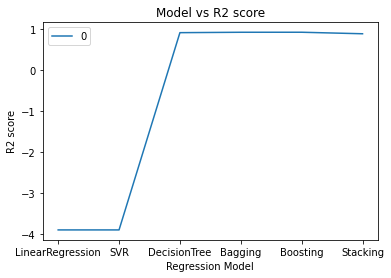

In [639]:
ax = RegR2_df.plot()
ax.set_xlabel('Regression Model')
ax.set_ylabel('R2 score')
ax.set_title('Model vs R2 score')

Text(0.5, 1.0, 'Model vs Accuracy')

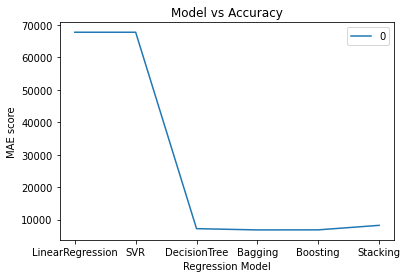

In [640]:
ax = RegMae_df.plot()
ax.set_xlabel('Regression Model')
ax.set_ylabel('MAE score')
ax.set_title('Model vs Accuracy')

# **Question 3**

In [641]:
df = pd.read_csv('/content/nfl2008_fga (2).csv')
df.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [642]:
df.dtypes

GameDate      int64
AwayTeam     object
HomeTeam     object
qtr           int64
min           int64
sec           int64
kickteam     object
def          object
down        float64
togo        float64
kicker        int64
ydline        int64
name         object
distance      int64
homekick      int64
kickdiff      int64
timerem       int64
offscore      int64
defscore      int64
season        int64
GOOD          int64
Missed        int64
Blocked       int64
dtype: object

In [643]:
print(df.shape)

(1039, 23)


In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GameDate  1039 non-null   int64  
 1   AwayTeam  1039 non-null   object 
 2   HomeTeam  1039 non-null   object 
 3   qtr       1039 non-null   int64  
 4   min       1039 non-null   int64  
 5   sec       1039 non-null   int64  
 6   kickteam  1039 non-null   object 
 7   def       1039 non-null   object 
 8   down      1037 non-null   float64
 9   togo      1037 non-null   float64
 10  kicker    1039 non-null   int64  
 11  ydline    1039 non-null   int64  
 12  name      1039 non-null   object 
 13  distance  1039 non-null   int64  
 14  homekick  1039 non-null   int64  
 15  kickdiff  1039 non-null   int64  
 16  timerem   1039 non-null   int64  
 17  offscore  1039 non-null   int64  
 18  defscore  1039 non-null   int64  
 19  season    1039 non-null   int64  
 20  GOOD      1039 non-null   int6

# LinearDiscriminantAnalysis

In [645]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[['togo', 'kicker', 'ydline']]
y = df['qtr']

In [646]:
X.isnull().sum()

togo      2
kicker    0
ydline    0
dtype: int64

In [647]:
X['togo'].fillna((X['togo'].median()),inplace=True)

In [648]:
X.isnull().sum()

togo      0
kicker    0
ydline    0
dtype: int64

In [649]:
for i in range(1,4):
  lda_mod = LinearDiscriminantAnalysis(n_components=i)
  X_lda = lda_mod.fit_transform(X, y)
  ratio = lda_mod.explained_variance_ratio_
  print(i,' Component has ', ratio, ' ratio')

1  Component has  [0.68762713]  ratio
2  Component has  [0.68762713 0.25309814]  ratio
3  Component has  [0.68762713 0.25309814 0.05927472]  ratio


In [650]:
X = df.drop(columns='qtr',axis=1)
y = df['qtr']

In [651]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GameDate  1039 non-null   int64  
 1   AwayTeam  1039 non-null   object 
 2   HomeTeam  1039 non-null   object 
 3   min       1039 non-null   int64  
 4   sec       1039 non-null   int64  
 5   kickteam  1039 non-null   object 
 6   def       1039 non-null   object 
 7   down      1037 non-null   float64
 8   togo      1037 non-null   float64
 9   kicker    1039 non-null   int64  
 10  ydline    1039 non-null   int64  
 11  name      1039 non-null   object 
 12  distance  1039 non-null   int64  
 13  homekick  1039 non-null   int64  
 14  kickdiff  1039 non-null   int64  
 15  timerem   1039 non-null   int64  
 16  offscore  1039 non-null   int64  
 17  defscore  1039 non-null   int64  
 18  season    1039 non-null   int64  
 19  GOOD      1039 non-null   int64  
 20  Missed    1039 non-null   int6

In [652]:
from sklearn.preprocessing import LabelEncoder

obj = ['AwayTeam','HomeTeam','kickteam','def','name']

for i in obj:
  labEn = LabelEncoder()
  X[i] = labEn.fit_transform(X[i])

In [653]:
X['togo'].fillna((X['togo'].median()),inplace=True)
X['down'].fillna((X['down'].median()),inplace=True)

In [654]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
lda_mod = LinearDiscriminantAnalysis(n_components=2)
X_ldaMod = lda_mod.fit_transform(X, y)  

df=pd.DataFrame(X_ldaMod)

In [655]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

acc = [] 
for i in range(50):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)
  model_dectree=DecisionTreeClassifier() 
  dtree = model_dectree.fit(X_train,y_train) 
  ypred = dtree.predict(X_test) 
  a = accuracy_score(y_test,ypred) 
  acc.append(a)
print("Accuracy:", np.mean(acc))  

Accuracy: 0.974551282051282


# **Principal Component Analysis**

In [656]:
df = pd.read_csv('/content/nfl2008_fga (2).csv')
df.head()

X = df[['togo', 'kicker', 'ydline']]
y = df['qtr']

X['togo'].fillna((X['togo'].median()),inplace=True)

from sklearn.decomposition import PCA
pca_mod = PCA(n_components= 2)
X_train = pca_mod.fit_transform(X_train)
X_test = pca_mod.transform(X_test)

for i in range(1,4):
  pca_mod = PCA(n_components= i)
  X_PCA = pca_mod.fit_transform(X, y)
  ratio = pca_mod.explained_variance_ratio_
  print(i,' Component has ', ratio, ' ratio')

1  Component has  [0.51432001]  ratio
2  Component has  [0.51432001 0.42368877]  ratio
3  Component has  [0.51432001 0.42368877 0.06199122]  ratio


In [657]:
X = df.drop(columns='qtr')
y = df['qtr']

from sklearn.preprocessing import LabelEncoder

obj = ['AwayTeam','HomeTeam','kickteam','def','name']

for i in obj:
  labEn = LabelEncoder()
  X[i] = labEn.fit_transform(X[i])

X['togo'].fillna((X['togo'].median()),inplace=True)
X['down'].fillna((X['down'].median()),inplace=True)


pca_mod = PCA(n_components= 2)
X_pcaMod = pca_mod.fit_transform(X, y) 
df=pd.DataFrame(X_pcaMod)

In [658]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

acc = [] 
for i in range(50):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)
  model_dt=DecisionTreeClassifier() 
  dectree = model_dt.fit(X_train,y_train) 
  ypred = dectree.predict(X_test) 
  accScore = accuracy_score(y_test,ypred) 
  acc.append(accScore)
print("Accuracy:", np.mean(acc))  

Accuracy: 0.9838461538461538


## **References**
•	SUV dataset online Available at: https://www.kaggle.com/datasets/iamaniket/suv-data

•	1.10. Decision Trees — scikit-learn 0.24.1 documentation (no date). Available at: https://scikit-learn.org/stable/modules/tree.html 

•	Nave Bayes Classifiers. Available at: https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes

•	Advantages and Disadvantages of KNN Algorithm in Machine Learning. Available at: http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-knn.html
